<a href="https://colab.research.google.com/github/danielicapui/machine_learning/blob/main/books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importações e configurações

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as pw
from numpy import dot
from numpy.linalg import norm
from scipy import sparse
from pandas.api.types import CategoricalDtype
import os
#%matplotlib inline
#pd.set_option("display.max_rows", 5)
#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)

path="/content/gdrive/MyDrive/csv"
os.chdir(path)

book = pd.read_csv("../csv/Books.csv")


FileNotFoundError: ignored

In [ ]:
#Trocando nome das colunas #q1
book.columns=["cod_item","cod_user","cod_opinion","cod_time"]
book.columns
#código do item, código do usuário, nota de avaliação e data no formato timestamp.



NameError: ignored

In [ ]:
book.cod_user.describe()

count           51311620
unique          15362619
top       A2OJW07GQRNJUT
freq                9684
Name: cod_user, dtype: object

Primeiras questões

In [ ]:
#Quantidade linhas no arquivo #q2
linhas=book.count()
#ou
linhas1=len(book.cod_item)
print("Número de linhas: {}\nOu linhas:{}".format(linhas,linhas1))
book.cod_time[51311619]

In [ ]:
#Quantidade de linhas null ou vazias #q3
valores_vazio=book.isnull().sum()
a=valores_vazio.cod_opinion
b=valores_vazio.cod_time
c=valores_vazio.cod_item
d=valores_vazio.cod_user
if(a==b and c==d and a==c):
  print("Não há valores nulos")
else:
  print("Limpando os valores nulos.")
  livro=book.dropna(inplace=True)

In [ ]:
print("Primeiros 5 registros.") #q4
book.head(5)

In [ ]:
#q5
print("últimos 5 registros.")
book.tail(5)

Questões dos usuários:


In [ ]:
#Números de usuarios distintos:User[0] 
result=book.cod_user.nunique()
print("Usuários distintos:")
result

Usuários distintos:


15362619

In [ ]:
##Outro meio de achar o usuário. User[1]
result = book.groupby("cod_user").cod_opinion.agg(["sum"]).sort_values(by="sum",ascending=False)
print(result) 
print("Número maior de avaliações: {}".format(result.iloc[0]))
print("Usuario: {}".format(result.index[0]))

                    sum
cod_user               
A2OJW07GQRNJUT  47733.0
A2F6N60Z96CAJI  41581.0
A328S9RN3U5M68  33948.0
AHUT55E980RDR   23919.0
A2TX179XAT5GRP  20229.0
...                 ...
A1GOFLG78QX6XS      1.0
A3JEGQYN2N9X7P      1.0
A2T7RFRG0T9P1A      1.0
A40HXWEOPNVK7       1.0
A3R0RH3VI1XPPF      0.0

[15362619 rows x 1 columns]
Número maior de avaliações: sum    47733.0
Name: A2OJW07GQRNJUT, dtype: float64
Usuario: A2OJW07GQRNJUT


In [ ]:
#Maneira correta
avaliacao_media = book.cod_opinion.mean()
avaliacao_media

4.39324737749461

In [ ]:
#Número de avaliações por pessoas, e usuario com mais.User[2]
ma = pd.DataFrame(book, columns=["cod_user","cod_opinion"]) 
result = ma.groupby('cod_user')['cod_opinion'].nunique() 
 
result=result.sort_index()
print(result) 
print("Máximo: {}".format(result.iloc[0]))
print("Usuario: {}".format(result.index[0]))
print(50*"-")
#soma
soma=ma.groupby('cod_user')['cod_opinion'].nunique()
soma=soma.sort_index()
print(soma)

In [ ]:
#Usuario que mais avaliou
book_by_user = book.groupby('cod_user')
user = book_by_user.cod_item.count().idxmax()
user

'A2OJW07GQRNJUT'

In [ ]:
#Maneira correta de mais avaliações
numeros_max = book_by_user.cod_item.count().max()
numeros_max

NameError: ignored

In [ ]:
#User[0]
#usuarios distintos
usu=book.cod_user.nunique()
usu
#print("Desconsiderando vazios.")
#usi=book.cod_user.np.unique()

15362619

Questões dos produtos:

In [ ]:
#produtos distintos #produto[0]
produto=book.cod_item.nunique()
produto

2930451

In [ ]:
#Produtos organizados e maior avaliado, #produto[1]
result = book.groupby("cod_item").cod_opinion.agg(["nunique"]).sort_values(by="nunique",ascending=False) 

print(result) 
print("Maior número de avaliações: {}".format(result.values[0]))
print("Produto: {}".format(result.index[0]))

In [ ]:
#Média de avaliação média em cada produtos #produto[2]
avaliacao_media=pd.DataFrame(book,columns=["cod_user","cod_opinion"])
result=avaliacao_media.groupby("cod_user")["cod_opinion"].mean()

In [ ]:
#outro meio de avaliação por usuario, média ,mais organizada #produto[2]
result = book.groupby("cod_item").cod_opinion.agg(["mean"]).sort_values(by="mean",ascending=False) 
print(result) 


            mean
cod_item        
1443829269   5.0
1482095564   5.0
1482209217   5.0
1482208865   5.0
1482208059   5.0
...          ...
1630223859   1.0
B0006F077A   1.0
B00ATBODZ8   1.0
1630224243   1.0
1418531030   1.0

[2930451 rows x 1 columns]


In [ ]:
#numéros de opiniões que cada usuario fez nos produtos #produto[1]
pa = pd.DataFrame(book, columns=["cod_item","cod_opinion"])
result = pa.groupby('cod_item')['cod_opinion'].nunique()
result=result.sort_values(by='max',ascending=False)
print(result)
print("produto que recebeu mais avaliação:")
print(result.head(0))

In [ ]:
#Esse está mais orgazinado
result = book.groupby("cod_item").cod_opinion.agg(["nunique"]).sort_values(by="nunique",ascending=False) 

print(result) 
print("Maior número de avaliações: {}".format(result.iloc[0]))
print("Produto: {}".format(result.index[0]))


Questões de gráficos:


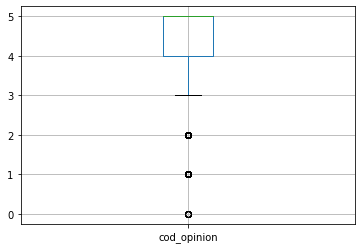

In [ ]:
#boxplot questão.
data=pd.DataFrame(book,columns=["cod_opinion"])
boxplot = data.boxplot(column="cod_opinion"
print("O gráfico diz que as variações médias dos livros estão entre 5,4 e 3  em outras palavras a maioria dos livros foi avaliado como bom  e está distríbuido no intervalo 3-5, entretanto, não que dizer que só existi valores bons, segundo o gráfico existi populações de valores 'ruins'(abaixo de 3) ")

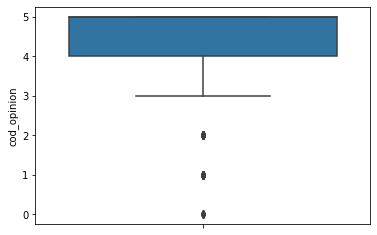

In [ ]:
#Usando sns
import seaborn as sns
sns.boxplot(data=book, y='cod_opinion');

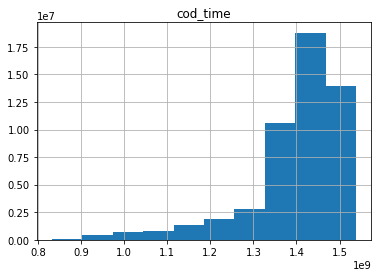

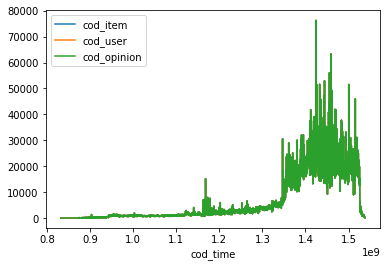

In [ ]:
#histograma questão.
his=book.hist(column='cod_time')
#teste
book.groupby('cod_time').count().plot()
print("Segundo o histograma as distribuições do tempo estão concentradas no intervalo 1.3 e 1.5  com valores superior a 1.Isso implica que o tempo decorrido em cada avaliação foi em média 1.4. Poucos usuários fizeram em menos de um timestamps")


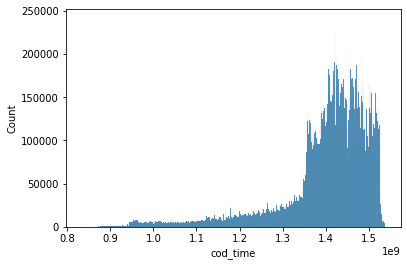

In [ ]:
#Maneira correta do histograma
sns.histplot(data = book, x='cod_time');

In [ ]:
ten=book.groupby("cod_item").filter(lambda x: x["cod_opinion"].count()>=4)
#media
ten
#opiniao1= pd.DataFrame(book.groupby('cod_item').cod_opinion.mean())
# Avaliações por produto
opiniao2 = book.groupby('cod_item').cod_opinion.count()
# Visualização dos 5 produtos mais bem avaliados (número de avaliações)
#As melhores avaliações
print("As melhores opiniões")
opiniao2.sort_values(ascending = False)
#As piores avaliações
print("As piores opiniões")
#opiniao2.sort_values(ascending=False).tail(10)

In [ ]:
from random import choice
#10 minutos,muito tempo tentar* ,diminuir
data=book.copy()
data["promocao"]=0
size=len(data.promocao)
numeros=int(size/10)
inu=[0,1]
for i in range(size):
  if numeros!=0:
    data.promocao[i]=choice(inu)
    numeros=numeros-1
  elif numeros<=0:
    break
data

In [ ]:
#3 segundos. Os 10 primeiros produtos em promoção
import random
data=book
book["cod_promocao"] =np.random.choice([0,1], len(book), p=[0.9,0.1])
data = book[book['cod_promocao']==1].sample(n=10).index.to_list()
data

In [ ]:
livro=data.copy()
livro["cod_relevancia"]=livro.cod_item.mean()* cod_opinon.count()*(1+0.5*livro.cod_promocao)

In [ ]:
#Calculando a relevância, maneira correta
Am = book_by_item_resumo['avaliacao']
Na = book_by_item_resumo['reviews']
Pr = book_by_item_resumo['cod_promocao']
book_by_item_resumo['relevancia'] = (Am*Na)*(1+0.5*Pr)
book_by_item_resumo

KeyError: ignored

In [ ]:
#Relevancia
lista3 = book_by_item_resumo.sort_values('relevancia', ascending=False).index[0:10].to_list()
lista3

In [ ]:
#maneira correta
book_by_item = book.groupby('cod_item')
avaliacao_media_produto = book_by_item.cod_opinion.mean()
contagem_produtos = book_by_item.cod_item.count()
book_by_item_resumo = pd.DataFrame({'avaliacao': avaliacao_media_produto, 'reviews':contagem_produtos})